## Model Building + Model Selection

In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

import pickle

In [43]:
bank_data = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 12\bank_data12")
bank_data_ad = pd.read_csv(r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 12\bank_data_ad12")

In [3]:
bank_data_ad.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'age', 'job', 'marital', 'education',
       'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
       'duration', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays', 'previous',
       'campaign', 'previous.1'],
      dtype='object')

In [4]:
bank_data = bank_data.drop(columns = {'Unnamed: 0.1', 'Unnamed: 0'})

In [5]:
bank_data_ad = bank_data_ad.drop(columns = {'Unnamed: 0.1', 'Unnamed: 0'})

### Correlation Matrices

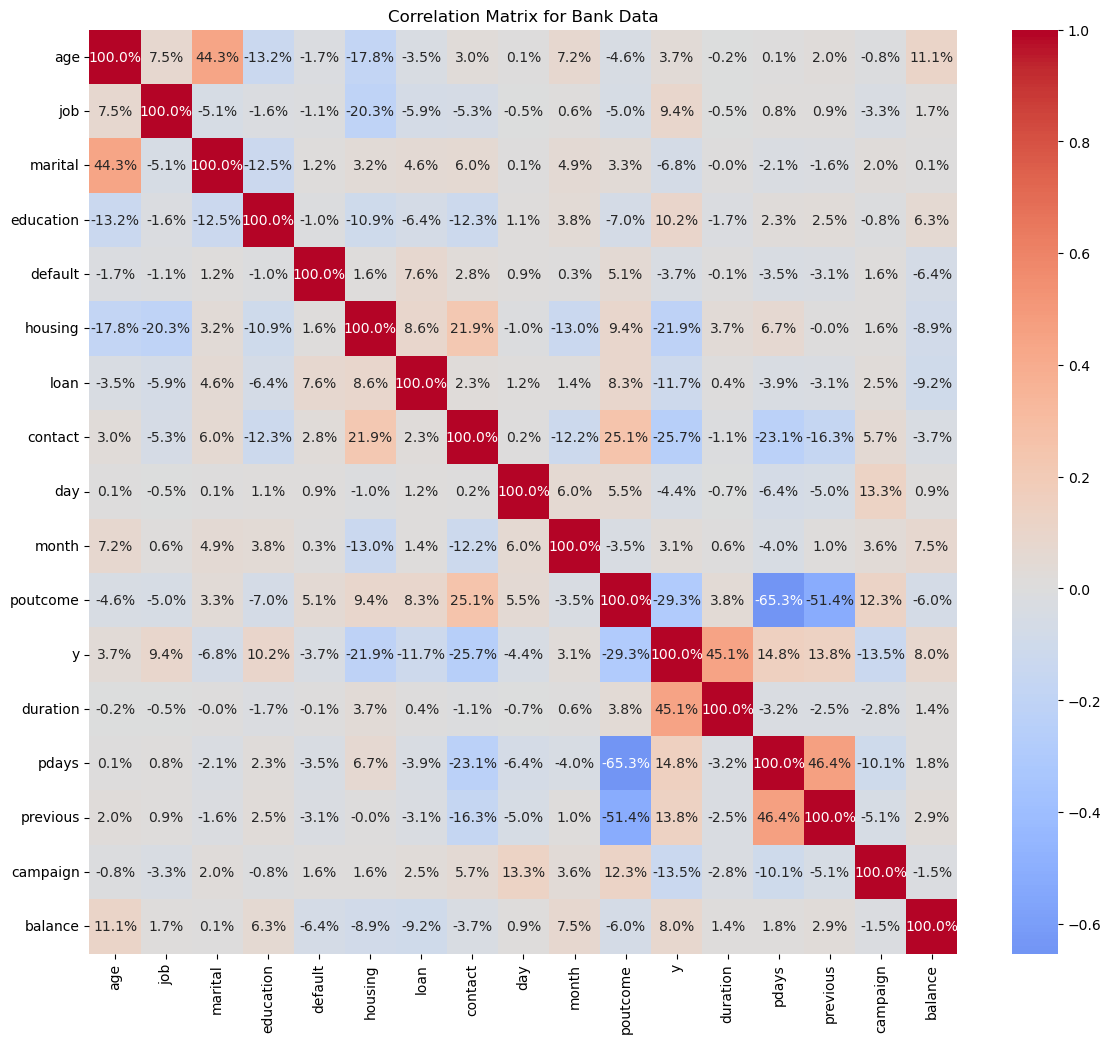

In [14]:
correlation_matrix = bank_data.corr()
formatted_matrix = (correlation_matrix * 100).round(1).astype(str) + '%'

plt.figure(figsize=(14, 12))

# Create the heatmap with formatted values
sns.heatmap(correlation_matrix, annot=formatted_matrix, cmap='coolwarm', center=0, fmt='')

plt.title("Correlation Matrix for Bank Data")
plt.show()

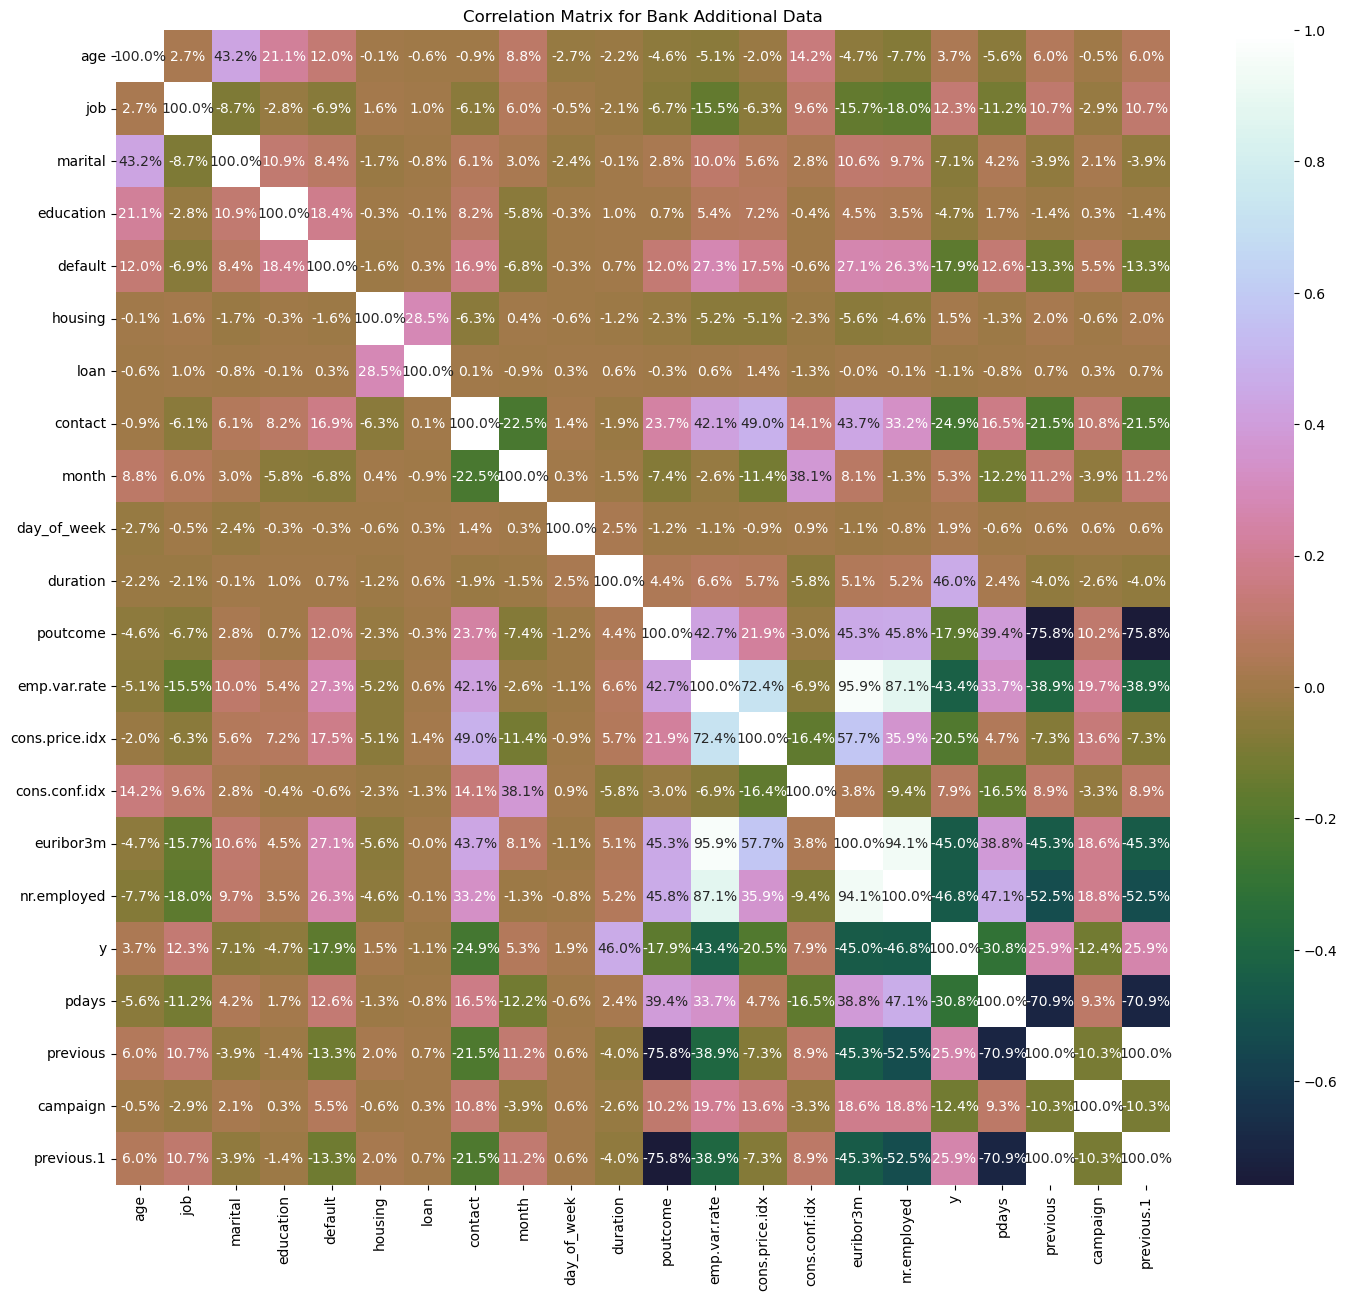

In [19]:
correlation_matrix_ad = bank_data_ad.corr()

formatted_matrix_ad = (correlation_matrix_ad * 100).round(1).astype(str) + '%'

# Create a heatmap using Seaborn
plt.figure(figsize=(17, 15))
sns.heatmap(correlation_matrix_ad, annot=formatted_matrix_ad, cmap='cubehelix', center=0, fmt='')
plt.title("Correlation Matrix for Bank Additional Data")
plt.show()

For bank_data, we set the correlation threshold to 0.05 . We will proceed to drop age, month, day and default columns. For the bank_data_ad, we set the same correlation threhold, dropping day_of_week, month, loan, housing, education and age.

## Correlation Analysis

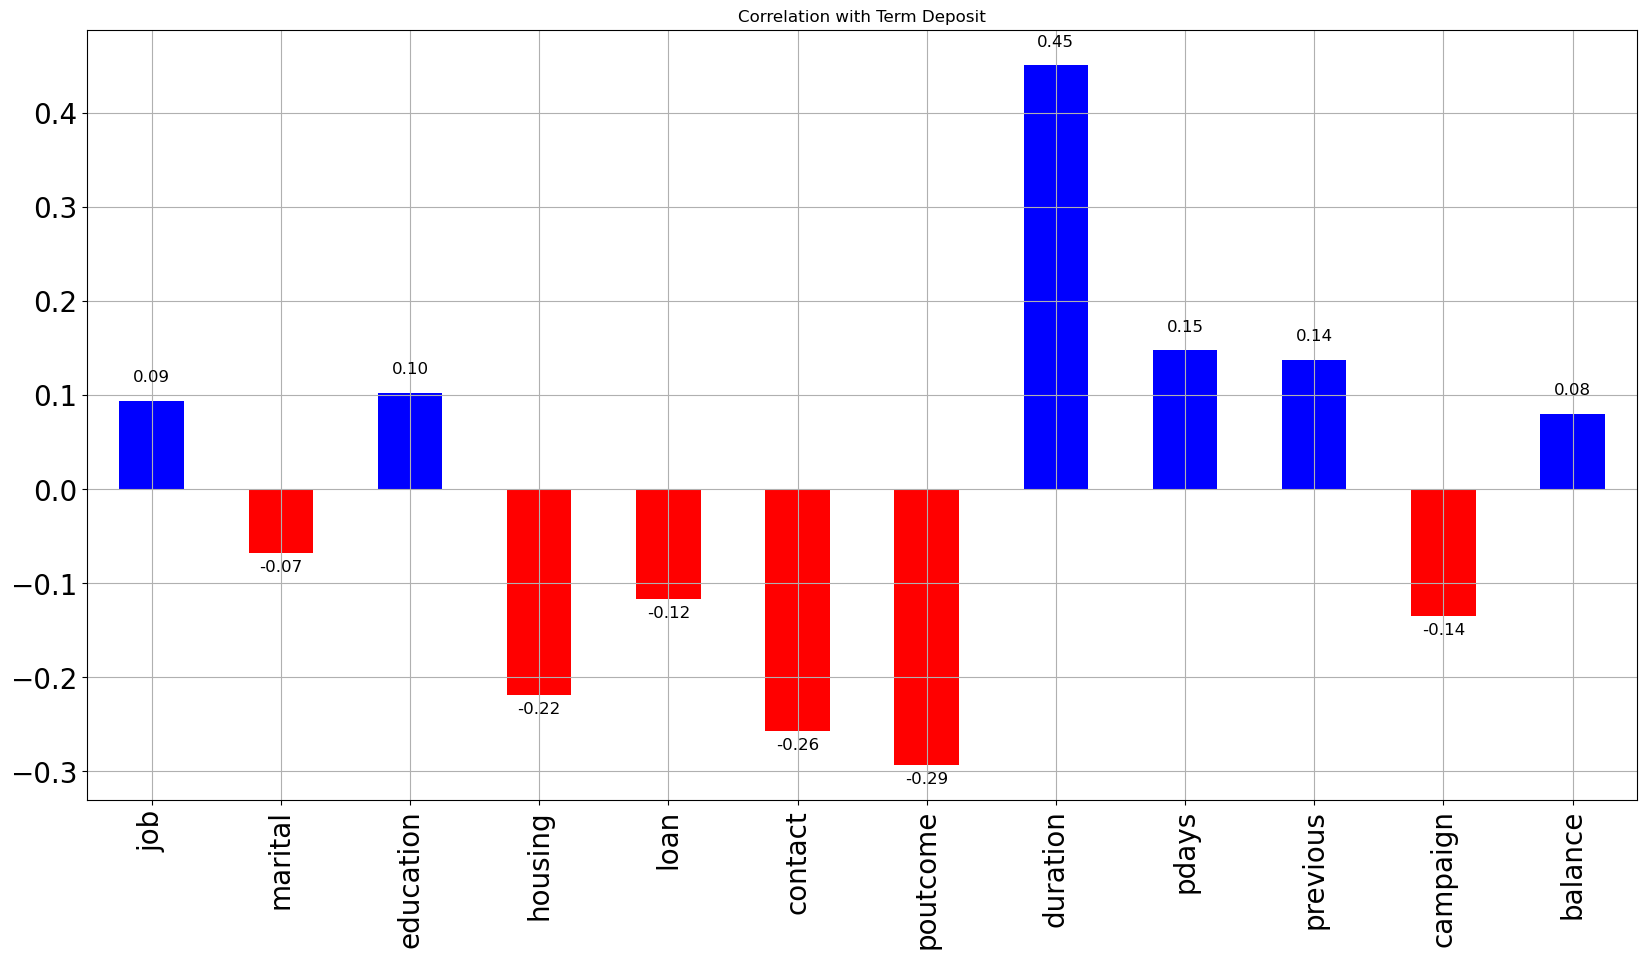

In [26]:
correlation_data = X.corrwith(bank_data["y"])

custom_colors = ['blue' if corr > 0 else 'red' for corr in correlation_data]

ax = correlation_data.plot.bar(
    figsize=(20, 10),
    title="Correlation with Term Deposit",
    fontsize=20,
    rot=90,
    grid=True,
    color=custom_colors
)

for i, corr in enumerate(correlation_data):
    if corr > 0:
        ax.text(i, corr + 0.02, f"{corr:.2f}", ha='center', fontsize=12)
    else:
        ax.text(i, corr - 0.02, f"{corr:.2f}", ha='center', fontsize=12)

plt.show()

## Train/Test Split

In [22]:
X = bank_data.drop(columns = {"y", "age", "month", "day", "default"})
y = bank_data["y"]

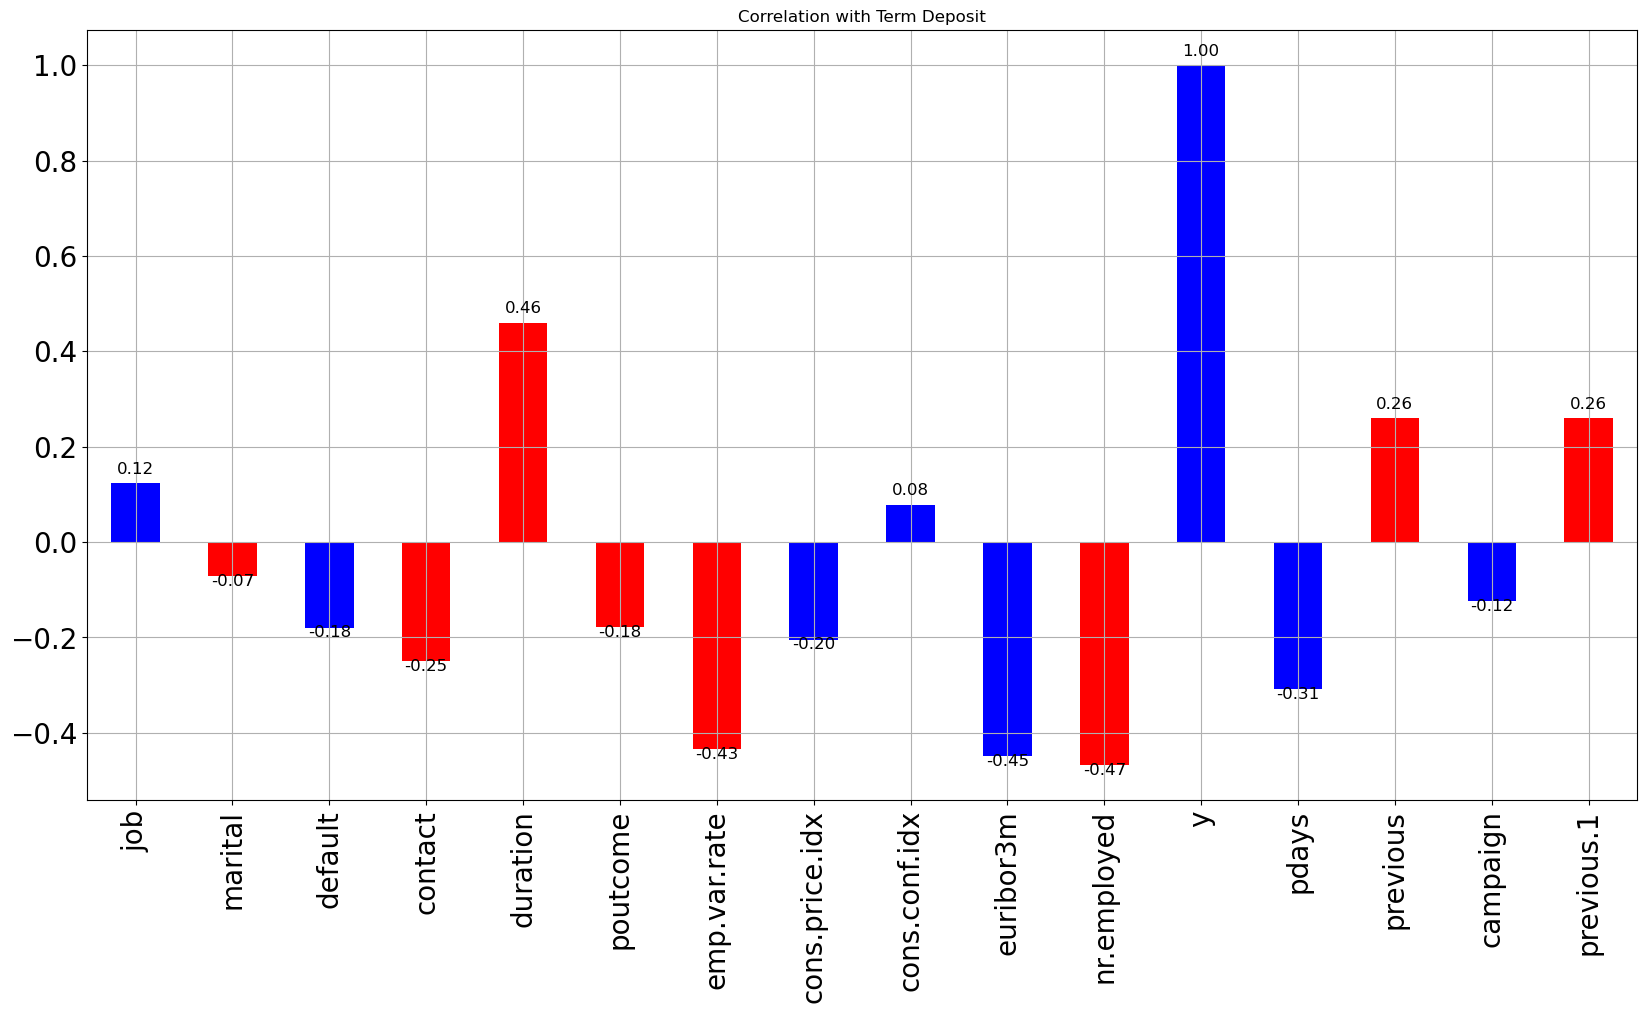

In [27]:
correlation_data_ad = X_ad.corrwith(bank_data_ad["y"])

custom_colors = ['blue' if corr > 0 else 'red' for corr in correlation_data]

ax = correlation_data_ad.plot.bar(
    figsize=(20, 10),
    title="Correlation with Term Deposit",
    fontsize=20,
    rot=90,
    grid=True,
    color=custom_colors
)

for i, corr in enumerate(correlation_data_ad):
    if corr > 0:
        ax.text(i, corr + 0.02, f"{corr:.2f}", ha='center', fontsize=12)
    else:
        ax.text(i, corr - 0.02, f"{corr:.2f}", ha='center', fontsize=12)

plt.show()

In [23]:
X_ad = bank_data_ad.drop(columns = {"day_of_week", "month", "loan", "housing", "education", "age"})
y_ad = bank_data_ad["y"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train_ad, X_test_ad, y_train_ad, y_test_ad = train_test_split(X_ad, y_ad, test_size=0.2, random_state=42)

### Linear Models - Logistic Regression

Accuracy: 0.8096
Accuracy: 0.8096
Precision: 0.8258
Recall: 0.7885
F1 Score: 0.8067
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      7922
           1       0.83      0.79      0.81      8047

    accuracy                           0.81     15969
   macro avg       0.81      0.81      0.81     15969
weighted avg       0.81      0.81      0.81     15969



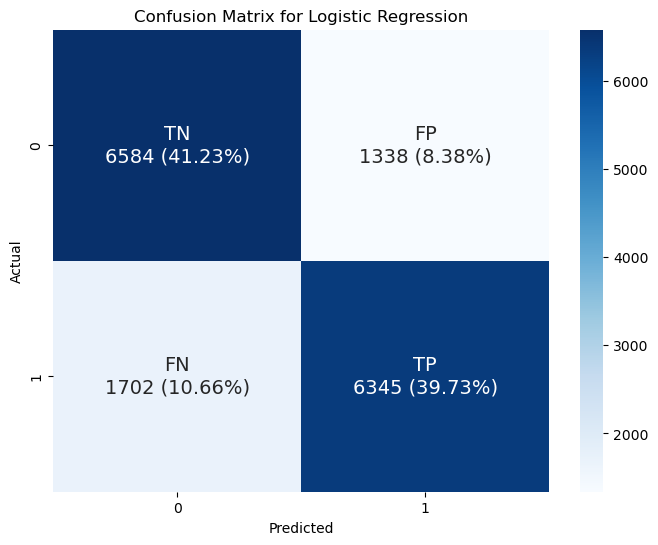

In [52]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga', 'newton-cg']
penalty = ['l2', 'l1', 'elasticnet', None]
c_values = [100, 10, 1.0, 0.1, 0.01]

grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = KFold(n_splits=10, shuffle=True, random_state=1)  # K-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
best_params = grid_result.best_params_
print("Best Hyperparameters:", best_params)

best_logistic_regression = LogisticRegression(**best_params)
best_logistic_regression.fit(X_train, y_train)

y_train_pred = best_logistic_regression.predict(X_train)

training_accuracy = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy)

C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
550 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Val

Best: 0.807984 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.807938 (0.006518) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.807938 (0.006518) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.807938 (0.006510) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.807484 (0.006232) with: {'C': 100, 'penalty': 'l2', 'solver': 'sag'}
0.807170 (0.006150) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.807938 (0.006518) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}
0.807953 (0.006510) with: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'sag'}
0.807155 (0.006129) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 10

The best hyper-parameters for the logistic regression model is C = 1.0, Penalty = l2, Solver = "newton-cg".

In [31]:
y_prob = best_logistic_regression.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

print("KS Statistic:", ks)

KS Statistic: 0.6248786831040949


### Ensemble Models - Random Forest

Accuracy: 0.9664
Precision: 0.9384
Recall: 0.9990
F1 Score: 0.9677
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.97      7922
           1       0.94      1.00      0.97      8047

    accuracy                           0.97     15969
   macro avg       0.97      0.97      0.97     15969
weighted avg       0.97      0.97      0.97     15969



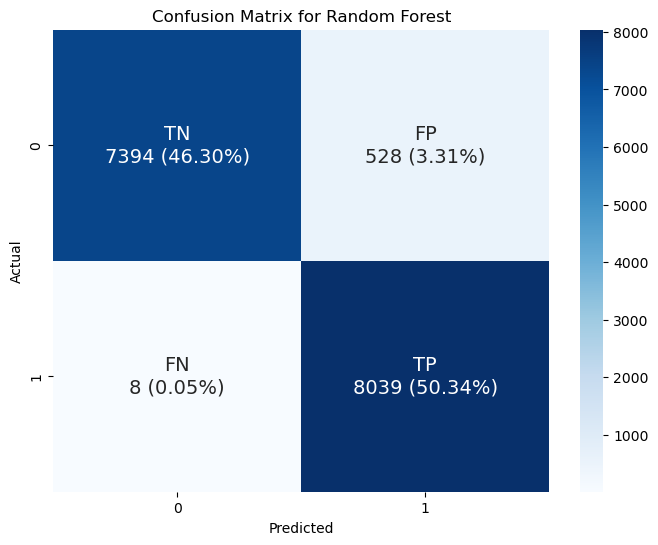

In [35]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)

print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

report1 = classification_report(y_test, y_pred1)
print("Classification Report:\n", report1)


In [ ]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)

TN = conf_matrix1[0, 0]
FN = conf_matrix1[1, 0]
TP = conf_matrix1[1, 1]
FP = conf_matrix1[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [50]:
y_prob2 = model1.predict_proba(X_test)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_prob2)
ks1 = max(tpr - fpr)

print("KS Statistic:", ks1)

KS Statistic: 0.9818985073398153


In [34]:
n_estimators = [50, 100, 150]
max_depths = [None, 10, 20, 30]
min_samples_splits = [2, 5, 10]
min_samples_leafs = [1, 2, 4]

grid1 = dict(n_estimators=n_estimators, max_depth=max_depths, min_samples_split=min_samples_splits, min_samples_leaf=min_samples_leafs)
cv1 = KFold(n_splits=10, shuffle=True, random_state=1)
grid_search1 = GridSearchCV(estimator=model1, param_grid=grid1, n_jobs=-1, cv=cv1, scoring='accuracy', error_score=0)
grid_result1 = grid_search1.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
best_params1 = grid_result1.best_params_
print("Best Hyperparameters:", best_params1)

best_random_forest = RandomForest(**best_params1)
best_random_forest.fit(X_train, y_train)

y_train_pred1 = best_random_forest.predict(X_train)

training_accuracy1 = accuracy_score(y_train, y_train_pred1)

print("Training Accuracy:", training_accuracy1)

KeyboardInterrupt: 

### Decision Trees

Accuracy: 0.9560
Precision: 0.9219
Recall: 0.9973
F1 Score: 0.9581
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      7922
           1       0.92      1.00      0.96      8047

    accuracy                           0.96     15969
   macro avg       0.96      0.96      0.96     15969
weighted avg       0.96      0.96      0.96     15969



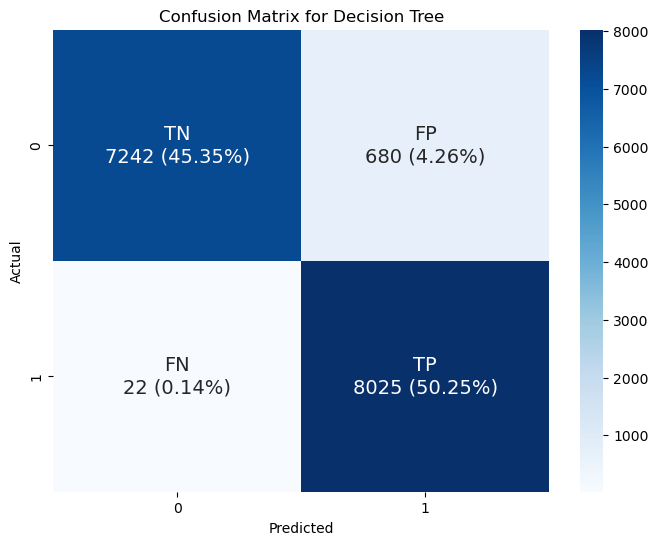

In [36]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

report2 = classification_report(y_test, y_pred2)
print("Classification Report:\n", report2)

In [ ]:
conf_matrix2 = confusion_matrix(y_test, y_pred2)

TN = conf_matrix2[0, 0]
FN = conf_matrix2[1, 0]
TP = conf_matrix2[1, 1]
FP = conf_matrix2[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Boosting

Accuracy: 0.9561024484939571
Precision: 0.9220
Recall: 0.9973
F1 Score: 0.9582
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      7922
           1       0.92      1.00      0.96      8047

    accuracy                           0.96     15969
   macro avg       0.96      0.96      0.96     15969
weighted avg       0.96      0.96      0.96     15969



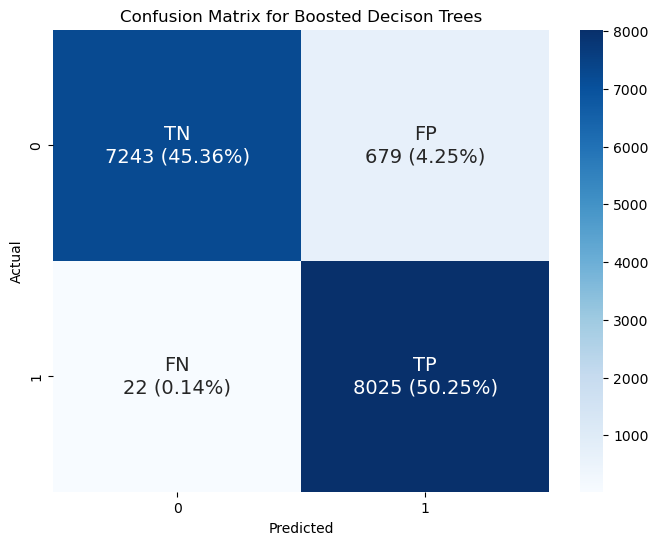

In [53]:
base_classifier = DecisionTreeClassifier()
n_estimators = 50
adaboost_model = AdaBoostClassifier(base_classifier, n_estimators=n_estimators)
adaboost_model.fit(X_train, y_train)
y_pred3 = adaboost_model.predict(X_test)

precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f1_3 = f1_score(y_test, y_pred3)
accuracy3 = accuracy_score(y_test, y_pred3)

print("Accuracy:", accuracy3)
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f1_3:.4f}")

report3 = classification_report(y_test, y_pred3)
print("Classification Report:\n", report3)

In [ ]:
conf_matrix3 = confusion_matrix(y_test, y_pred3)

TN = conf_matrix3[0, 0]
FN = conf_matrix3[1, 0]
TP = conf_matrix3[1, 1]
FP = conf_matrix3[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Boosted Decison Trees")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Bagging

Accuracy: 0.9626776880205398
Accuracy: 0.9627
Precision: 0.9325
Recall: 0.9981
F1 Score: 0.9642
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96      7922
           1       0.93      1.00      0.96      8047

    accuracy                           0.96     15969
   macro avg       0.97      0.96      0.96     15969
weighted avg       0.96      0.96      0.96     15969



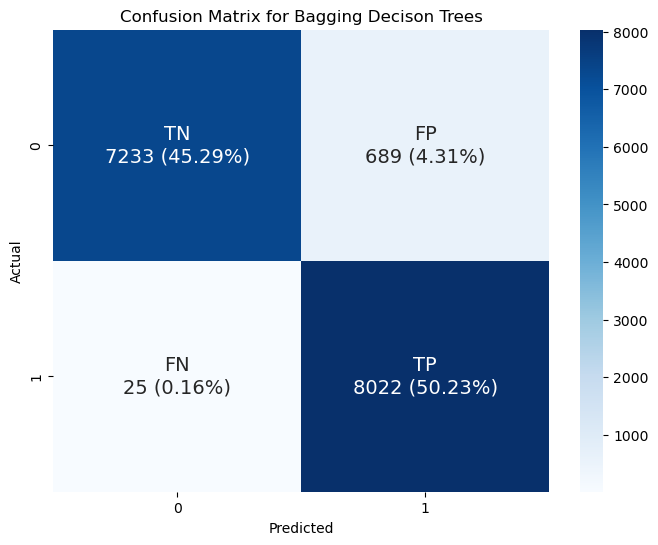

In [39]:
base_classifier = DecisionTreeClassifier()
n_estimators = 50
bagging_model = BaggingClassifier(base_classifier, n_estimators=n_estimators)
bagging_model.fit(X_train, y_train)

y_pred4 = bagging_model.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)

print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_4:.4f}")

report4 = classification_report(y_test, y_pred4)
print("Classification Report:\n", report4)



In [ ]:
conf_matrix4 = confusion_matrix(y_test, y_pred4)

TN = conf_matrix3[0, 0]
FN = conf_matrix3[1, 0]
TP = conf_matrix3[1, 1]
FP = conf_matrix3[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix4, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Bagging Decison Trees")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Stacking Models

We will stack the bagging model and the logistic regression to see if it outperforms the random forest model

Accuracy: 0.9863485503162377
Accuracy: 0.9863
Precision: 0.9785
Recall: 0.9948
F1 Score: 0.9866
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      7922
           1       0.98      0.99      0.99      8047

    accuracy                           0.99     15969
   macro avg       0.99      0.99      0.99     15969
weighted avg       0.99      0.99      0.99     15969



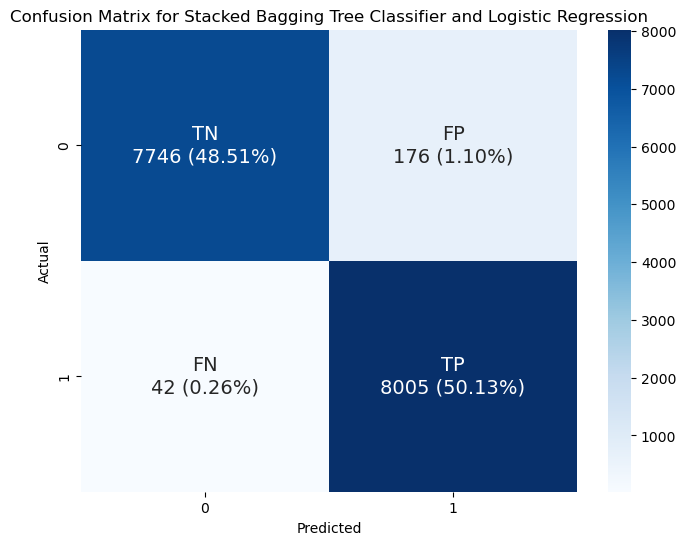

In [41]:
base_classifiers = [
    ('bagging_classifier', BaggingClassifier(n_estimators=50)),
    ('logistic_regression', LogisticRegression(max_iter=1000))
]

final_layer = LogisticRegression(max_iter=1000)
stacking_model = StackingClassifier(estimators=base_classifiers, final_estimator=final_layer)
stacking_model.fit(X_train, y_train)

y_pred5 = stacking_model.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f1_5 = f1_score(y_test, y_pred5)

print(f"Accuracy: {accuracy5:.4f}")
print(f"Precision: {precision5:.4f}")
print(f"Recall: {recall5:.4f}")
print(f"F1 Score: {f1_5:.4f}")


report5 = classification_report(y_test, y_pred5)
print("Classification Report:\n", report5)


In [ ]:

conf_matrix5 = confusion_matrix(y_test, y_pred5)

TN = conf_matrix5[0, 0]
FN = conf_matrix5[1, 0]
TP = conf_matrix5[1, 1]
FP = conf_matrix5[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Stacked Bagging Tree Classifier and Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Stacking the models does indeed outperform the Random Forest, this will be used as our final model for the bank_data dataset.

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

print("KS Statistic:", ks)

In [46]:
base_model = model2

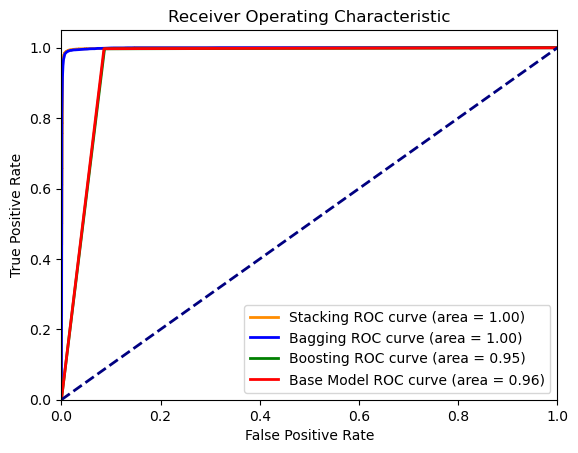

In [47]:
y_pred_proba5 = stacking_model.predict_proba(X_test)[:, 1]
y_preda_proba4 = bagging_model.predict_proba(X_test)[:, 1]
y_preda_proba3 = adaboost_model.predict_proba(X_test)[:, 1]
y_preda_proba2 = base_model.predict_proba(X_test)[:, 1]

fpr5, tpr5, _ = roc_curve(y_test, y_pred_proba5)
roc_auc5 = auc(fpr5, tpr5)
fpr4, tpr4, _ = roc_curve(y_test, y_preda_proba4)
roc_auc4 = auc(fpr4, tpr4)
fpr3, tpr3, _ = roc_curve(y_test, y_preda_proba3)
roc_auc3 = auc(fpr3, tpr3)
fpr2, tpr2, _ = roc_curve(y_test, y_preda_proba2)
roc_auc2 = auc(fpr2, tpr2)


plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label='Stacking ROC curve (area = %0.2f)' % roc_auc5)
plt.plot(fpr4, tpr4, color='blue', lw=2, label='Bagging ROC curve (area = %0.2f)' % roc_auc4)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Boosting ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Base Model ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [49]:
#Caculating KS Statistics
ks5 = max(tpr5 - fpr5)
ks4 = max(tpr4 - fpr4)
ks3 = max(tpr3 - fpr3)
ks2 = max(tpr2 - fpr2)
print(ks5, ks2, ks3, ks4)

0.9797525845930343 0.9114291520151727 0.9099202655241154 0.9770958563403398


## Bank Additional Data Model Training

#### Logistic Regression

In [60]:
model_ad = LogisticRegression()
model_ad.fit(X_train_ad, y_train_ad)

y_pred_ad = model_ad.predict(X_test_ad)

accuracy = accuracy_score(y_test_ad, y_pred_ad)
precision = precision_score(y_test_ad, y_pred_ad)
recall = recall_score(y_test_ad, y_pred_ad)
f1 = f1_score(y_test_ad, y_pred_ad)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

report = classification_report(y_test_ad, y_pred_ad)
print("Classification Report:\n", report)

Accuracy: 0.9554
Precision: 0.9483
Recall: 0.9625
F1 Score: 0.9553
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      7369
           1       0.95      0.96      0.96      7246

    accuracy                           0.96     14615
   macro avg       0.96      0.96      0.96     14615
weighted avg       0.96      0.96      0.96     14615



C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


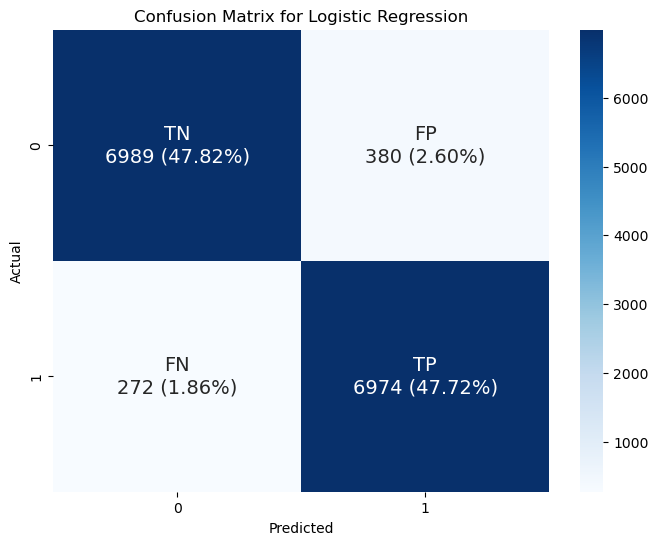

In [61]:
conf_matrix_ad = confusion_matrix(y_test_ad, y_pred_ad)

TN = conf_matrix_ad[0, 0]
FN = conf_matrix_ad[1, 0]
TP = conf_matrix_ad[1, 1]
FP = conf_matrix_ad[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ad, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Ensemble - Random Forest

In [62]:
model_ad1 = RandomForestClassifier()
model_ad1.fit(X_train_ad, y_train_ad)
y_pred_ad1 = model_ad1.predict(X_test_ad)

accuracy1 = accuracy_score(y_test_ad, y_pred_ad1)
precision1 = precision_score(y_test_ad, y_pred_ad1)
recall1 = recall_score(y_test_ad, y_pred_ad1)
f1_1 = f1_score(y_test_ad, y_pred_ad1)

print(f"Accuracy: {accuracy1:.4f}")
print(f"Precision: {precision1:.4f}")
print(f"Recall: {recall1:.4f}")
print(f"F1 Score: {f1_1:.4f}")

report = classification_report(y_test_ad, y_pred_ad1)
print("Classification Report:\n", report)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7369
           1       1.00      1.00      1.00      7246

    accuracy                           1.00     14615
   macro avg       1.00      1.00      1.00     14615
weighted avg       1.00      1.00      1.00     14615



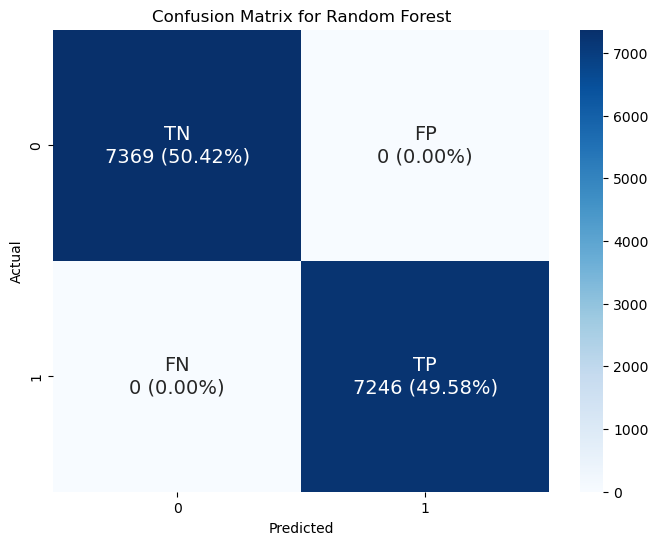

In [63]:
conf_matrix_ad1 = confusion_matrix(y_test_ad, y_pred_ad1)

TN = conf_matrix_ad1[0, 0]
FN = conf_matrix_ad1[1, 0]
TP = conf_matrix_ad1[1, 1]
FP = conf_matrix_ad1[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ad1, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
y_prob_ad2 = model_ad1.predict_proba(X_test_ad)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test_ad, y_prob_ad2)
ks_1 = max(tpr - fpr)

print("KS Statistic:", ks_1)

KS Statistic: 1.0


#### Decison Tree

In [66]:
model_ad2 = DecisionTreeClassifier()
model_ad2.fit(X_train_ad, y_train_ad)
y_pred_ad2 = model_ad2.predict(X_test_ad)

accuracy2 = accuracy_score(y_test_ad, y_pred_ad2)
precision2 = precision_score(y_test_ad, y_pred_ad2)
recall2 = recall_score(y_test_ad, y_pred_ad2)
f1_2 = f1_score(y_test_ad, y_pred_ad2)

print(f"Accuracy: {accuracy2:.4f}")
print(f"Precision: {precision2:.4f}")
print(f"Recall: {recall2:.4f}")
print(f"F1 Score: {f1_2:.4f}")

report2 = classification_report(y_test_ad, y_pred_ad2)
print("Classification Report:\n", report2)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7369
           1       1.00      1.00      1.00      7246

    accuracy                           1.00     14615
   macro avg       1.00      1.00      1.00     14615
weighted avg       1.00      1.00      1.00     14615



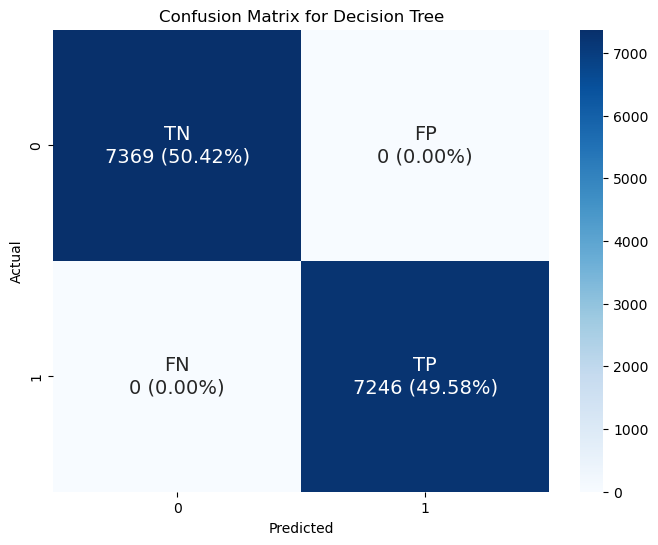

In [67]:
conf_matrix_ad2 = confusion_matrix(y_test_ad, y_pred_ad2)

TN = conf_matrix_ad2[0, 0]
FN = conf_matrix_ad2[1, 0]
TP = conf_matrix_ad2[1, 1]
FP = conf_matrix_ad2[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ad2, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Boosting

In [70]:
base_classifier = DecisionTreeClassifier()
n_estimators = 50
adaboost_model_ad = AdaBoostClassifier(base_classifier, n_estimators=n_estimators)
adaboost_model_ad.fit(X_train_ad, y_train_ad)
y_pred_ad3 = adaboost_model_ad.predict(X_test_ad)

precision3 = precision_score(y_test_ad, y_pred_ad3)
recall3 = recall_score(y_test_ad, y_pred_ad3)
f1_3 = f1_score(y_test_ad, y_pred_ad3)
accuracy3 = accuracy_score(y_test_ad, y_pred_ad3)

print("Accuracy:", accuracy3)
print(f"Precision: {precision3:.4f}")
print(f"Recall: {recall3:.4f}")
print(f"F1 Score: {f1_3:.4f}")

report3 = classification_report(y_test_ad, y_pred_ad3)
print("Classification Report:\n", report3)

Accuracy: 1.0
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7369
           1       1.00      1.00      1.00      7246

    accuracy                           1.00     14615
   macro avg       1.00      1.00      1.00     14615
weighted avg       1.00      1.00      1.00     14615



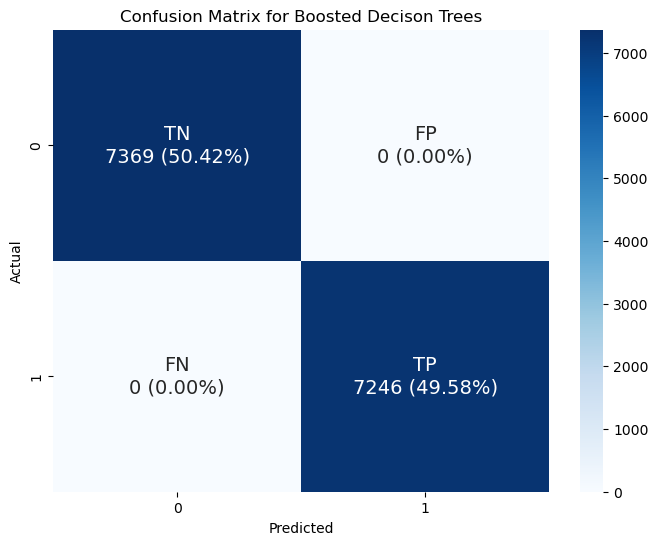

In [74]:
conf_matrix_ad3 = confusion_matrix(y_test_ad, y_pred_ad3)

TN = conf_matrix_ad3[0, 0]
FN = conf_matrix_ad3[1, 0]
TP = conf_matrix_ad3[1, 1]
FP = conf_matrix_ad3[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ad3, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Boosted Decison Trees")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Bagging

In [75]:
base_classifier = DecisionTreeClassifier()
n_estimators = 50
bagging_model_ad = BaggingClassifier(base_classifier, n_estimators=n_estimators)
bagging_model_ad.fit(X_train_ad, y_train_ad)

y_pred_ad4 = bagging_model_ad.predict(X_test_ad)

accuracy4 = accuracy_score(y_test_ad, y_pred_ad4)
precision4 = precision_score(y_test_ad, y_pred_ad4)
recall4 = recall_score(y_test_ad, y_pred_ad4)
f1_4 = f1_score(y_test_ad, y_pred_ad4)

print(f"Accuracy: {accuracy4:.4f}")
print(f"Precision: {precision4:.4f}")
print(f"Recall: {recall4:.4f}")
print(f"F1 Score: {f1_4:.4f}")

report4 = classification_report(y_test_ad, y_pred_ad4)
print("Classification Report:\n", report4)

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7369
           1       1.00      1.00      1.00      7246

    accuracy                           1.00     14615
   macro avg       1.00      1.00      1.00     14615
weighted avg       1.00      1.00      1.00     14615



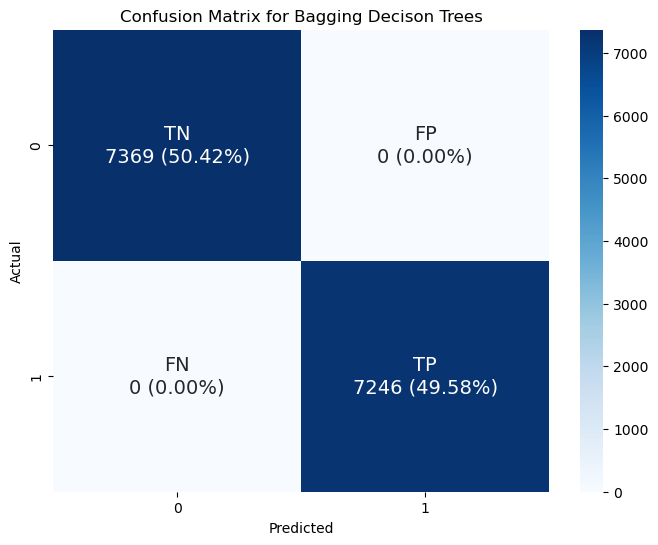

In [76]:
conf_matrix_ad4 = confusion_matrix(y_test_ad, y_pred_ad4)

TN = conf_matrix_ad4[0, 0]
FN = conf_matrix_ad4[1, 0]
TP = conf_matrix_ad4[1, 1]
FP = conf_matrix_ad4[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ad4, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Bagging Decison Trees")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Stacked Model

In [78]:
base_classifiers = [
    ('bagging_classifier', BaggingClassifier(n_estimators=50)),
    ('logistic_regression', LogisticRegression(max_iter=1000))
]

final_layer_ad = LogisticRegression(max_iter=1000)
stacking_model_ad = StackingClassifier(estimators=base_classifiers, final_estimator=final_layer)
stacking_model_ad.fit(X_train_ad, y_train_ad)

y_pred_ad5 = stacking_model_ad.predict(X_test_ad)

accuracy5 = accuracy_score(y_test_ad, y_pred_ad5)
precision5 = precision_score(y_test_ad, y_pred_ad5)
recall5 = recall_score(y_test_ad, y_pred_ad5)
f1_5 = f1_score(y_test_ad, y_pred_ad5)

print(f"Accuracy: {accuracy5:.4f}")
print(f"Precision: {precision5:.4f}")
print(f"Recall: {recall5:.4f}")
print(f"F1 Score: {f1_5:.4f}")


report5 = classification_report(y_test_ad, y_pred_ad5)
print("Classification Report:\n", report5)

C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7369
           1       1.00      1.00      1.00      7246

    accuracy                           1.00     14615
   macro avg       1.00      1.00      1.00     14615
weighted avg       1.00      1.00      1.00     14615



C:\Users\rgs88\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


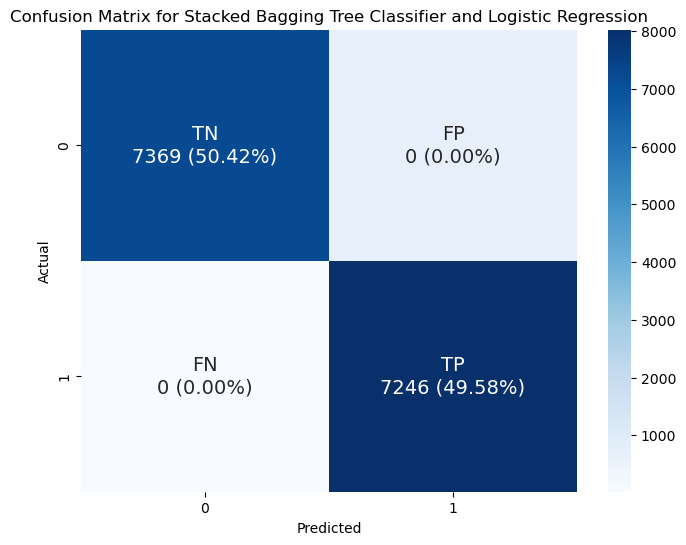

In [80]:
conf_matrix5 = confusion_matrix(y_test_ad, y_pred_ad5)

TN = conf_matrix5[0, 0]
FN = conf_matrix5[1, 0]
TP = conf_matrix5[1, 1]
FP = conf_matrix5[0, 1]

total = TN + FN + TP + FP
TN_percent = (TN / total) * 100
FN_percent = (FN / total) * 100
TP_percent = (TP / total) * 100
FP_percent = (FP / total) * 100

annot_labels = [[f'TN\n{TN} ({TN_percent:.2f}%)', f'FP\n{FP} ({FP_percent:.2f}%)'],
                [f'FN\n{FN} ({FN_percent:.2f}%)', f'TP\n{TP} ({TP_percent:.2f}%)']]

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=annot_labels, fmt="", cmap="Blues", annot_kws={"size": 14})
plt.title("Confusion Matrix for Stacked Bagging Tree Classifier and Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
ks = max(tpr - fpr)

print("KS Statistic:", ks)

In [ ]:
y_pred_proba5 = stacking_model.predict_proba(X_test)[:, 1]
y_preda_proba4 = bagging_model.predict_proba(X_test)[:, 1]
y_preda_proba3 = adaboost_model.predict_proba(X_test)[:, 1]
y_preda_proba2 = base_model.predict_proba(X_test)[:, 1]

fpr5, tpr5, _ = roc_curve(y_test, y_pred_proba5)
roc_auc5 = auc(fpr5, tpr5)
fpr4, tpr4, _ = roc_curve(y_test, y_preda_proba4)
roc_auc4 = auc(fpr4, tpr4)
fpr3, tpr3, _ = roc_curve(y_test, y_preda_proba3)
roc_auc3 = auc(fpr3, tpr3)
fpr2, tpr2, _ = roc_curve(y_test, y_preda_proba2)
roc_auc2 = auc(fpr2, tpr2)


plt.figure()
plt.plot(fpr5, tpr5, color='darkorange', lw=2, label='Stacking ROC curve (area = %0.2f)' % roc_auc5)
plt.plot(fpr4, tpr4, color='blue', lw=2, label='Bagging ROC curve (area = %0.2f)' % roc_auc4)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Boosting ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Base Model ROC curve (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Caculating KS Statistics
ks5 = max(tpr5 - fpr5)
ks4 = max(tpr4 - fpr4)
ks3 = max(tpr3 - fpr3)
ks2 = max(tpr2 - fpr2)
print(ks5, ks2, ks3, ks4)

## Saving the Models

In [59]:
file_path = r"C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 12\final-model-bank-stacked.pkl"
with open(file_path, 'wb') as file:
    pickle.dump(stacking_model, file)
#final_model_bank = pickle.dump(stacking_model, open("final-model-bank-stacked.pkl", "wb"))
print(f"Stacked Model saved as '{file_path}'")

Stacked Model saved as 'C:\Users\rgs88\OneDrive\Documents\Data Glacier Internship\Week 12\final-model-bank-stacked.pkl'
